In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

In [2]:
class WAZIR_BLOCK1(nn.Module):
    def __init__(self):
        super().__init__()
        self.CONVOLUTION_LAYER_1 = nn.Conv2d(1,96,8, stride=16,bias=False)
        self.CONVOLUTION_LAYER_2 = nn.Conv2d(1,96,8, stride=16,bias=False)
        self.CONVOLUTION_LAYER_3 = nn.Conv2d(1,96,8, stride=16,bias=False)
        self.PRELU_1 = nn.PReLU()
        self.PRELU_2 = nn.PReLU()
        self.PRELU_3 = nn.PReLU()
    def forward(self,x):
        y1 = self.CONVOLUTION_LAYER_1(x)
        pa = self.PRELU_1(y1)
        y2 = self.CONVOLUTION_LAYER_2(x)
        pb = self.PRELU_2(y2)
        y3 = self.CONVOLUTION_LAYER_3(x)
        pc = self.PRELU_3(y3)
        out1 = torch.cat((pa,pb,pc),1)
        return out1
model1 = WAZIR_BLOCK1()
print(model1)

WAZIR_BLOCK1(
  (CONVOLUTION_LAYER_1): Conv2d(1, 96, kernel_size=(8, 8), stride=(16, 16), bias=False)
  (CONVOLUTION_LAYER_2): Conv2d(1, 96, kernel_size=(8, 8), stride=(16, 16), bias=False)
  (CONVOLUTION_LAYER_3): Conv2d(1, 96, kernel_size=(8, 8), stride=(16, 16), bias=False)
  (PRELU_1): PReLU(num_parameters=1)
  (PRELU_2): PReLU(num_parameters=1)
  (PRELU_3): PReLU(num_parameters=1)
)


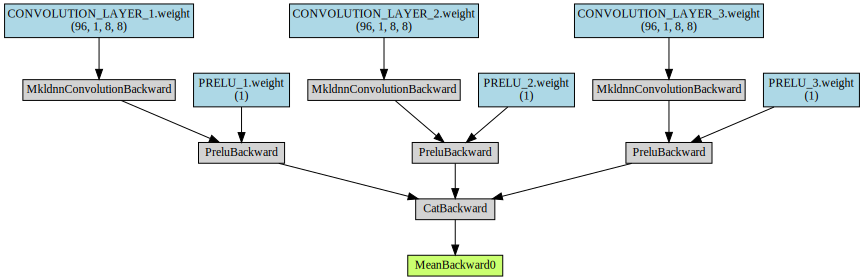

In [3]:
x = Variable(torch.randn(1,1,33,33))
y = model1(x)
make_dot(y.mean(),params=dict(model1.named_parameters()))

In [4]:
from prettytable import PrettyTable

def count_parameters(model1):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model1.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model1)

+----------------------------+------------+
|          Modules           | Parameters |
+----------------------------+------------+
| CONVOLUTION_LAYER_1.weight |    6144    |
| CONVOLUTION_LAYER_2.weight |    6144    |
| CONVOLUTION_LAYER_3.weight |    6144    |
|       PRELU_1.weight       |     1      |
|       PRELU_2.weight       |     1      |
|       PRELU_3.weight       |     1      |
+----------------------------+------------+
Total Trainable Params: 18435


18435